In [61]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pprint
import random
%matplotlib inline

# Function with 2 variables

$y=3x^2 - 4x + 5$


In [62]:
def f(x):
    return 3*x**2 - 4*x + 5

## Plot the Curve

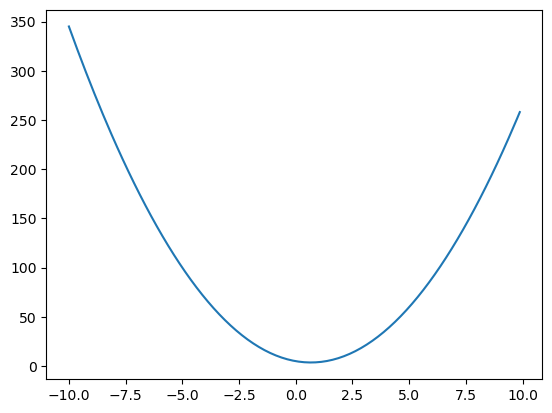

In [63]:
xs = np.arange(-10, 10, 0.125)
ys = f(xs)
plt.plot(xs, ys)

##  Calculate the slope at given x location

In [64]:
def getSlope(x):
    h = 0.000000001
    s = (f(x) - f(x - h)) / h
    return s

print(getSlope(-3.0))

-22.000001820288162


# Function with 3 variables 

In [65]:
d = lambda a, b, c: a * b +c

In [66]:
a = 2.0
b = -3.0
c = 10.0
d(a, b, c)

4.0

## Compute the diravative respect to $a$ at a point ($a,b,c$)

In [67]:
h = 0.00001
slope = (d(a+h, b, c) - d(a, b, c)) / h
print(d(a, b, c))
print(d(a+h, b, c))
print(slope)

4.0
3.9999699999999994
-3.000000000064062


##  Compute the derivative respect to $b$ at a point ($a, b, c$)

In [68]:
h = 0.00001
slope = (d(a, b+h, c) - d(a, b, c)) / h
print(d(a, b, c))
print(d(a, b+h, c))
print(slope)

4.0
4.00002
2.0000000000131024


##  Compute the derivative respect to $c$ at a point ($a, b, c$)

In [69]:
h = 0.00001
slope = (d(a, b, c+h) - d(a, b, c)) / h
print(d(a, b, c))
print(d(a, b, c+h))
print(slope)

4.0
4.00001
0.9999999999621422


# Create a Value Object

In [70]:
class Value:
    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data # this is where numerical value get stored
        # this will contain the children nodes
        self._prev = set(_children)
        # Record the operation
        self._op = _op
        self.label = label
        self.grad = 0.0
    def __repr__(self):
        return "Value(data = {})".format(self.data)
    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        return out
    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        return out
    def tanh(self):
        x = self.data
        t = (math.exp(2 * x) - 1)/(math.exp(2 * x) + 1)
        return Value(t, (self, ), 'tanh')

In [71]:
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a * b 
e.label='e'
d = e + c
d.label='d'
f = Value(-2.0, label='f')
L = d * f
L.label = 'L'



print(L)

Value(data = -8.0)


In [72]:
d._prev

{Value(data = -6.0), Value(data = 10.0)}

In [73]:
d._op

'+'

## Visualize computational graph 

In [74]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
    nodes, edges = trace(root)
    print(nodes)
    print(edges)
    for n in nodes:
        uid = str(id(n))
        # for any value in the graph, create a rectangular ('record') node for it
        # dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
        
        dot.node(name = uid, label = "{ %s | data = %.4f | grad = %.4f}" % (n.label, n.data, n.grad), shape='record')
            
        if n._op:
            # if this value is a result of some operation, create an op node for it
            dot.node(name = uid + n._op, label = n._op)
            # and connect this node to it
            dot.edge(uid + n._op, uid)

    for n1, n2 in edges:
        # connect n1 to the op node of n2
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
        
    return dot

{Value(data = 2.0), Value(data = -8.0), Value(data = -2.0), Value(data = -6.0), Value(data = 4.0), Value(data = -3.0), Value(data = 10.0)}
{(Value(data = -3.0), Value(data = -6.0)), (Value(data = 4.0), Value(data = -8.0)), (Value(data = 2.0), Value(data = -6.0)), (Value(data = -6.0), Value(data = 4.0)), (Value(data = 10.0), Value(data = 4.0)), (Value(data = -2.0), Value(data = -8.0))}


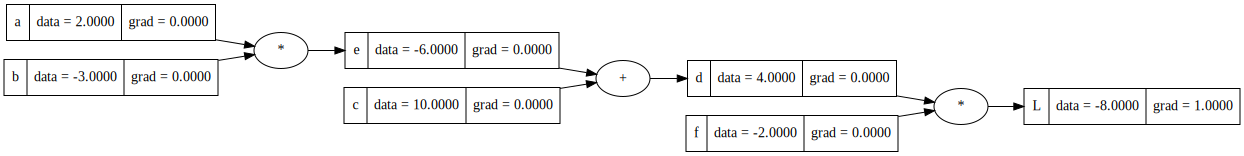

In [75]:
L.grad = 1.0
draw_dot(L)

# Compute the gradiants 

In [76]:
def getSlope(a, b, c, f, dval, h=0.00001):
    a = Value(a, label='a')
    b = Value(b, label='b')
    c = Value(c, label='c')
    f = Value(f, label='f')
    
    e = a * b; e.label = 'e'
    d = e + c; d.label = 'd'
    L = d * f; L.label = 'L'
    
    L1 = L.data
    
    # Shift the value 
    if dval == 'a':
        a = Value(a.data + h, label='a')
    if dval == 'b':
        b = Value(b.data + h, label='b')
    if dval == 'c':
        c = Value(c.data + h, label='c')
    if dval == 'f':
        f = Value(f.data + h, label='f')
    
    e = a * b; e.label = 'e'
    if dval == 'e':
        e = Value(e.data + h, label='e')
        
    d = e + c; d.label = 'd'
    if dval == 'd':
        d = Value(d.data + h, label='d')

    L = d * f; L.label = 'L'
    if dval == 'L':
        L = Value(L.data + h, label='L')
    
    L2 = L.data
    
    s = (L2 - L1)/h
    
    return s

## Compute the gradiants at each node

{Value(data = 2.0), Value(data = -8.0), Value(data = -2.0), Value(data = -6.0), Value(data = 4.0), Value(data = -3.0), Value(data = 10.0)}
{(Value(data = -3.0), Value(data = -6.0)), (Value(data = 4.0), Value(data = -8.0)), (Value(data = 2.0), Value(data = -6.0)), (Value(data = -6.0), Value(data = 4.0)), (Value(data = 10.0), Value(data = 4.0)), (Value(data = -2.0), Value(data = -8.0))}


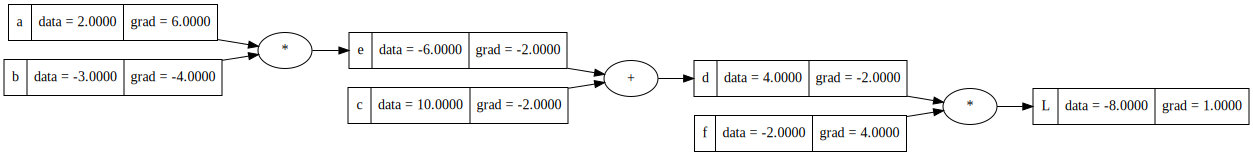

In [77]:
a_val = 2.0
b_val = -3.0
c_val = 10.0
f_val = -2.0
L.grad = getSlope(a_val, b_val, c_val, f_val, 'L')
f.grad = getSlope(a_val, b_val, c_val, f_val, 'f')
d.grad = getSlope(a_val, b_val, c_val, f_val, 'd')
c.grad = getSlope(a_val, b_val, c_val, f_val, 'c')
e.grad = getSlope(a_val, b_val, c_val, f_val, 'e')
b.grad = getSlope(a_val, b_val, c_val, f_val, 'b')
a.grad = getSlope(a_val, b_val, c_val, f_val, 'a')

draw_dot(L)

![Back-prop](nn1.jpg)

# Change all the inputs towards its gradiants by by small step size to get the L to increase by little amount 

## Chage the data by small step size

In [78]:
small_step_size = 0.001

a.data += a.grad * small_step_size
b.data += b.grad * small_step_size
c.data += c.grad * small_step_size
f.data += f.grad * small_step_size

## Apply the forward pass

{Value(data = 2.006000000000128), Value(data = -6.0260240000004375), Value(data = -1.9959999999999738), Value(data = -7.928064095999174), Value(data = -3.004000000000026), Value(data = 9.998000000000076), Value(data = 3.9719759999996382)}
{(Value(data = 3.9719759999996382), Value(data = -7.928064095999174)), (Value(data = -3.004000000000026), Value(data = -6.0260240000004375)), (Value(data = 9.998000000000076), Value(data = 3.9719759999996382)), (Value(data = 2.006000000000128), Value(data = -6.0260240000004375)), (Value(data = -6.0260240000004375), Value(data = 3.9719759999996382)), (Value(data = -1.9959999999999738), Value(data = -7.928064095999174))}


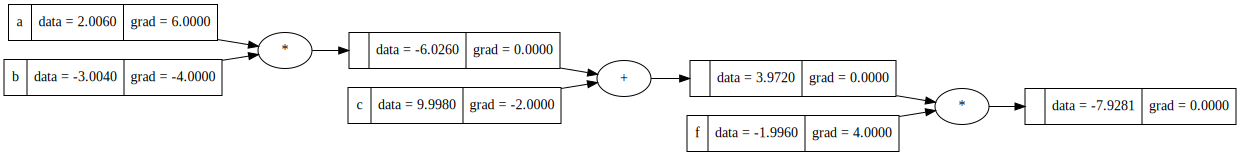

In [79]:
# forward pass
e = a * b
d = c + e
L = d * f
draw_dot(L)

# Coding a one Neuron 

![neuron](neuron.png)

## Plot Activation Function (tanh)

This Activation function map the input values to a value between -1 to 1

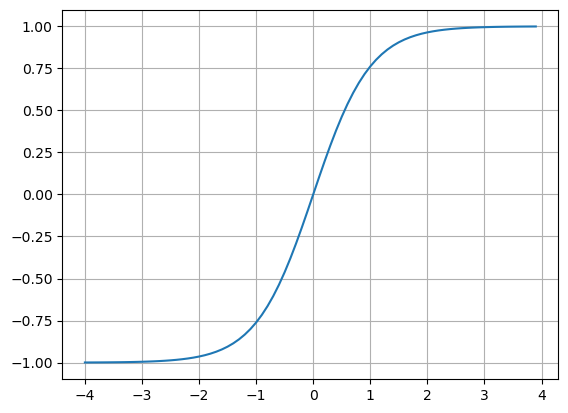

In [80]:
plt.plot(
    np.arange(-4, 4, 0.1),
    np.tanh(np.arange(-4, 4, 0.1))
)
plt.grid()

## Define the inputs

In [81]:
x1 = Value(2.0, label='X1')
x2 = Value(0.0, label='X2')

## Define weights

In [82]:
w1 = Value(-3.0, label='W1')
w2 = Value(1.0, label='W2')

## Define biase

In [83]:
# b = Value(8.0, label='b')

b = Value(6.8813735870195432, label='b')

## Compute the summation

$\sum_{i=1}^{n}{x_{i}w_{i}} + b$

{Value(data = -3.0), Value(data = 6.881373587019543), Value(data = -6.0), Value(data = 0.8813735870195432), Value(data = 0.0), Value(data = 0.0), Value(data = -6.0), Value(data = 1.0), Value(data = 2.0)}
{(Value(data = -6.0), Value(data = -6.0)), (Value(data = -3.0), Value(data = -6.0)), (Value(data = 1.0), Value(data = 0.0)), (Value(data = -6.0), Value(data = 0.8813735870195432)), (Value(data = 6.881373587019543), Value(data = 0.8813735870195432)), (Value(data = 2.0), Value(data = -6.0)), (Value(data = 0.0), Value(data = -6.0)), (Value(data = 0.0), Value(data = 0.0))}


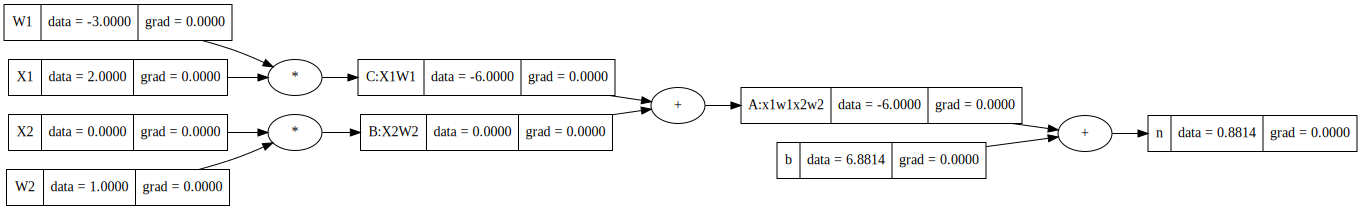

In [84]:
x1w1 = x1 * w1
x1w1.label = 'C:X1W1'

x2w2 = x2 * w2
x2w2.label = 'B:X2W2'

x1w1x2w2 = x1w1 + x2w2
x1w1x2w2.label = 'A:x1w1x2w2'

n = x1w1x2w2 + b
n.label = 'n'

# Implement the tanh function in the Value object
draw_dot(n)

## Apply the activation function 

{Value(data = -3.0), Value(data = 6.881373587019543), Value(data = -6.0), Value(data = 0.8813735870195432), Value(data = 0.0), Value(data = 0.7071067811865476), Value(data = 0.0), Value(data = -6.0), Value(data = 1.0), Value(data = 2.0)}
{(Value(data = -6.0), Value(data = -6.0)), (Value(data = -3.0), Value(data = -6.0)), (Value(data = 1.0), Value(data = 0.0)), (Value(data = -6.0), Value(data = 0.8813735870195432)), (Value(data = 6.881373587019543), Value(data = 0.8813735870195432)), (Value(data = 2.0), Value(data = -6.0)), (Value(data = 0.0), Value(data = -6.0)), (Value(data = 0.8813735870195432), Value(data = 0.7071067811865476)), (Value(data = 0.0), Value(data = 0.0))}


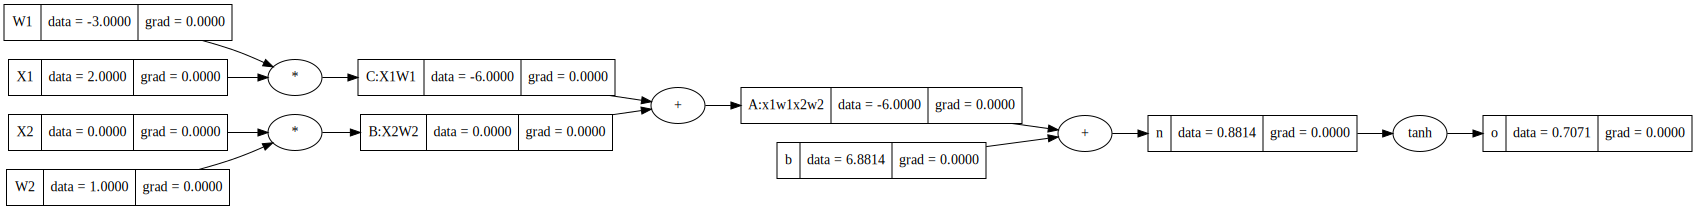

In [85]:
o = n.tanh()
o.label = 'o'
draw_dot(o)

## Analytical calculations of the gradiants of each step 

![backprop](backprop1.jpeg)

## Calulate all the gradiant values of each node

### Gradiant of the node-o $\big(\frac{\partial o}{\partial o} = 1\big)$

In [86]:
o.grad = 1

### Gradiant of the node-n $\big(\frac{\partial o}{\partial n} = 1 - tanh^2(n)\big)$

In [87]:
n.grad = 1 - np.tanh(n.data)**2
print(n.grad)

0.4999999999999999


### Gradiant of the node-b $\big(\frac{\partial o}{\partial A} = \frac{\partial o}{\partial n} = (1-\tanh^2(n)) \big)$

In [88]:
x1w1x2w2.grad = n.grad
print(x1w1x2w2.grad)

0.4999999999999999


### Gradiant of the node-A $\big(\frac{\partial o}{\partial b} = \frac{\partial o}{\partial n} = (1-\tanh^2(n)) \big)$

In [89]:
b.grad = n.grad
print(b.grad)

0.4999999999999999


### Gradiant of node-B $\big(\frac{\partial o}{\partial B} = \frac{\partial o}{\partial A}  =  \frac{\partial o}{\partial n} = (1-\tanh^2(n)) \big)$

In [90]:
x2w2.grad = x1w1x2w2.grad
print(x2w2.grad)

0.4999999999999999


### Gradiant of node-C $\big(\frac{\partial o}{\partial C} = \frac{\partial o}{\partial A}  =  \frac{\partial o}{\partial n} = (1-\tanh^2(n)) \big)$

In [91]:
x1w1.grad = x1w1x2w2.grad
print(x1w1.grad)

0.4999999999999999


### Gradiant of node-w2 $\big(\frac{\partial o}{\partial w2} = x2\frac{\partial o}{\partial B}  \big)$

In [92]:
w2.grad = x2.data * x2w2.grad
print(w2.grad)

0.0


### Graidant of node-w1 $\big(\frac{\partial o}{\partial w1} = x1\frac{\partial o}{\partial C}  \big)$

In [93]:
w1.grad = x1.data * x1w1.grad
print(w1.grad)

0.9999999999999998


### Gradiant of node-x1 $\big(\frac{\partial o}{\partial x1} = w1\frac{\partial o}{\partial C}  \big)$

In [94]:
x1.grad = w1.data * x1w1.grad
print(x1.grad)

-1.4999999999999996


### Gradiant of node-x2 $\big(\frac{\partial o}{\partial x2} = w2\frac{\partial o}{\partial B}  \big)$

In [95]:
x2.grad = w2.data * x2w2.grad
print(x2.grad)

0.4999999999999999


## All the gradiants are calculated using back-propogation

{Value(data = -3.0), Value(data = 6.881373587019543), Value(data = -6.0), Value(data = 0.8813735870195432), Value(data = 0.0), Value(data = 0.7071067811865476), Value(data = 0.0), Value(data = -6.0), Value(data = 1.0), Value(data = 2.0)}
{(Value(data = -6.0), Value(data = -6.0)), (Value(data = -3.0), Value(data = -6.0)), (Value(data = 1.0), Value(data = 0.0)), (Value(data = -6.0), Value(data = 0.8813735870195432)), (Value(data = 6.881373587019543), Value(data = 0.8813735870195432)), (Value(data = 2.0), Value(data = -6.0)), (Value(data = 0.0), Value(data = -6.0)), (Value(data = 0.8813735870195432), Value(data = 0.7071067811865476)), (Value(data = 0.0), Value(data = 0.0))}


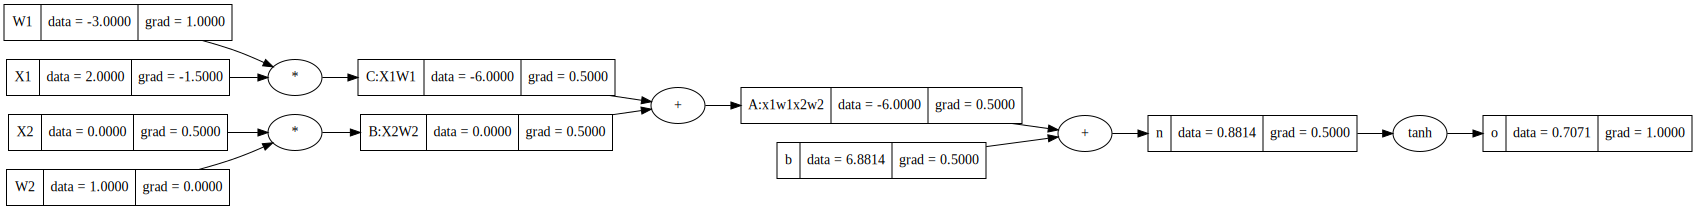

In [96]:
draw_dot(o)

# Implement the back propogation in the code 

In [97]:
class Value_v2:
    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data # this is where numerical value get stored
        # this will contain the children nodes
        self._prev = set(_children)
        # Record the operation
        self._op = _op
        self.label = label
        self.grad = 0.0
        
        # this method perfom the backpropgation 
        self._backward = lambda: None # <-- By default there is no function implemented
        
    def __repr__(self):
        return "Value(data = {})".format(self.data)
    def __add__(self, other):
        out = Value_v2(self.data + other.data, (self, other), '+')
        
        #################################################################################################
        ########### Backprop method for the addition operation ##########################################
        #################################################################################################
        def _backward_add():
            # In the addition operation the gradiant from the output get distributed to self and other
            print('in the backward_add')
            self.grad = 1 * out.grad
            other.grad = 1 * out.grad
            
        out._backward = _backward_add # <-- Define the backprop local method
        #################################################################################################
        
        return out
    
    def __mul__(self, other):
        out = Value_v2(self.data * other.data, (self, other), '*')
        
        #################################################################################################
        ########### Backprop method for the multiplication operation ####################################
        #################################################################################################
        def _backward_mul():
            self.grad = other.data * out.grad 
            other.grad = self.data * out.grad
        
        out._backward = _backward_mul # <-- Define the backprop in local method 
        #################################################################################################
        
        return out
    def tanh(self):
        x = self.data
        # this is tanh(x)
        t = (math.exp(2 * x) - 1)/(math.exp(2 * x) + 1)
        out = Value_v2(t, (self, ), 'tanh')
        
        #################################################################################################
        ########### Backprop method for the tanh operation ##############################################
        #################################################################################################
        def _backward_tanh():
            print('in the backward_tanh')
            self.grad = (1 - t**2) * out.grad
        
        out._backward = _backward_tanh # <-- Define the backprop in local method
        #################################################################################################
        
        return out
        

![Backprop](backprop_2.jpeg)

### Call the back propogation manually on each node

in the backward_tanh
in the backward_add
in the backward_add
{Value(data = -3.0), Value(data = 1.0), Value(data = 0.0), Value(data = 0.7071067811865476), Value(data = -6.0), Value(data = 2.0), Value(data = 0.0), Value(data = 6.881373587019543), Value(data = 0.8813735870195432), Value(data = -6.0)}
{(Value(data = 2.0), Value(data = -6.0)), (Value(data = 1.0), Value(data = 0.0)), (Value(data = 0.8813735870195432), Value(data = 0.7071067811865476)), (Value(data = 0.0), Value(data = 0.0)), (Value(data = -6.0), Value(data = 0.8813735870195432)), (Value(data = 0.0), Value(data = -6.0)), (Value(data = 6.881373587019543), Value(data = 0.8813735870195432)), (Value(data = -6.0), Value(data = -6.0)), (Value(data = -3.0), Value(data = -6.0))}


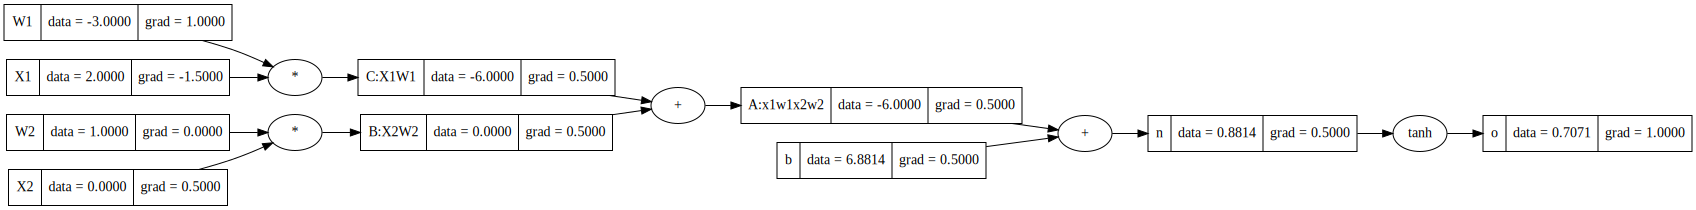

In [98]:
x1 = Value_v2(2.0, label='X1')
x2 = Value_v2(0.0, label='X2')
w1 = Value_v2(-3.0, label='W1')
w2 = Value_v2(1.0, label='W2')
b = Value_v2(6.8813735870195432, label='b')

C = x1 * w1
C.label = 'C:X1W1'

B = x2 * w2
B.label = 'B:X2W2'

A = C + B
A.label = 'A:x1w1x2w2'

n = A + b
n.label = 'n'
# Implement the tanh function in the Value object

o = n.tanh()
o.label = 'o'
o.grad = 1.0
o._backward()
n._backward()
b._backward()
A._backward()
B._backward()
C._backward()
w1._backward()
x1._backward()
w2._backward()
x2._backward()

draw_dot(o)

### Automate the back propogation across all the nodes

**The idea**: 
- We need to call the backward method on the last node of the graph which is the node-o (```o.backward()```)
- When (```o.backward()```) method execution completed, the connected (```n.backward()```) node backward method need to execute


**The method**:
- Step 1: Generate the topological sorted list of all the nodes (Learn more about topological graph: [Topological Sorting Video](https://www.youtube.com/watch?v=eL-KzMXSXXI))
  - Topological sort contain the dag with dependencies
- Step 2: Reverse the topological sort to get the last node to the beginning of the graph
- Step 3: Iteratively execute the ```backwared()``` method to execute the back propogation

#### This implements the topological sort for the graph 

In [99]:
topological_graph = []
visited_nodes = set()
def build_topological_graph(v):
    if v not in visited_nodes:
        visited_nodes.add(v)
        for child in v._prev:
            build_topological_graph(child)
        topological_graph.append(v)


build_topological_graph(o)
pprint.pprint(topological_graph)

[Value(data = 1.0),
 Value(data = 0.0),
 Value(data = 0.0),
 Value(data = 2.0),
 Value(data = -3.0),
 Value(data = -6.0),
 Value(data = -6.0),
 Value(data = 6.881373587019543),
 Value(data = 0.8813735870195432),
 Value(data = 0.7071067811865476)]


### Implement the backprop method in the class

In [100]:
class Value_v3:
    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data # this is where numerical value get stored
        # this will contain the children nodes
        self._prev = set(_children)
        # Record the operation
        self._op = _op
        self.label = label
        self.grad = 0.0
        
        # this method perfom the backpropgation 
        self._backward = lambda: None # <-- By default there is no function implemented
        
    def __repr__(self):
        return "Value_v3(data = {})".format(self.data)
    def __add__(self, other):
        out = Value_v3(self.data + other.data, (self, other), '+')
        def _backward_add():
            # In the addition operation the gradiant from the output get distributed to self and other
            self.grad += 1 * out.grad
            other.grad += 1 * out.grad
            
        out._backward = _backward_add # <-- Define the backprop local method
        
        return out
    
    def __mul__(self, other):
        out = Value_v3(self.data * other.data, (self, other), '*')
        def _backward_mul():
            self.grad += other.data * out.grad 
            other.grad += self.data * out.grad
        
        out._backward = _backward_mul # <-- Define the backprop in local method 
        
        return out
    def tanh(self):
        x = self.data
        # this is tanh(x)
        t = (math.exp(2 * x) - 1)/(math.exp(2 * x) + 1)
        out = Value_v3(t, (self, ), 'tanh')
    
        def _backward_tanh():
            self.grad += (1 - t**2) * out.grad
        
        out._backward = _backward_tanh # <-- Define the backprop in local method
        
        return out
    
    def backpropogate(self):   
        topological_graph = []
        visited_nodes = set()
        
        # Generate the topological sorted list of all the nodes
        def build_topological_graph(v):
            if v not in visited_nodes:
                visited_nodes.add(v)
                for child in v._prev:
                    build_topological_graph(child)
                topological_graph.append(v)

        self.grad = 1.0
        build_topological_graph(self)
        
        # Reverse the topological order and execute the _backwared() method of each node in the reversed list
        for node in reversed(topological_graph):
            node._backward()

{Value_v3(data = 0.0), Value_v3(data = 0.7071067811865476), Value_v3(data = -6.0), Value_v3(data = 0.8813735870195432), Value_v3(data = 1.0), Value_v3(data = 6.881373587019543), Value_v3(data = 0.0), Value_v3(data = -6.0), Value_v3(data = 2.0), Value_v3(data = -3.0)}
{(Value_v3(data = -6.0), Value_v3(data = -6.0)), (Value_v3(data = 0.0), Value_v3(data = -6.0)), (Value_v3(data = 0.0), Value_v3(data = 0.0)), (Value_v3(data = 2.0), Value_v3(data = -6.0)), (Value_v3(data = -6.0), Value_v3(data = 0.8813735870195432)), (Value_v3(data = 1.0), Value_v3(data = 0.0)), (Value_v3(data = 6.881373587019543), Value_v3(data = 0.8813735870195432)), (Value_v3(data = 0.8813735870195432), Value_v3(data = 0.7071067811865476)), (Value_v3(data = -3.0), Value_v3(data = -6.0))}


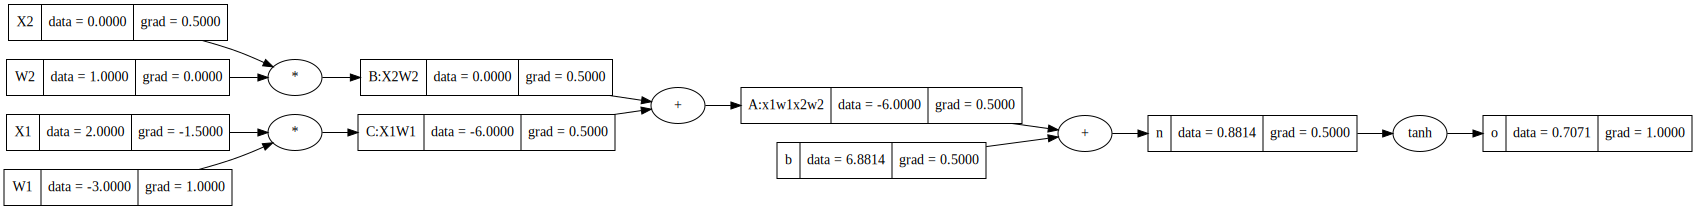

In [101]:
x1 = Value_v3(2.0, label='X1')
x2 = Value_v3(0.0, label='X2')
w1 = Value_v3(-3.0, label='W1')
w2 = Value_v3(1.0, label='W2')
b = Value_v3(6.8813735870195432, label='b')

C = x1 * w1
C.label = 'C:X1W1'
B = x2 * w2
B.label = 'B:X2W2'
A = C + B
A.label = 'A:x1w1x2w2'
n = A + b
n.label = 'n'
o = n.tanh()
o.label = 'o'

# Back propogate the entier graph
o.backpropogate()

draw_dot(o)

# Implement the tanh(x) using its exponential definition 

$tanh(x) = \frac{e^{2x} - 1}{e^{2x} + 1}$



## Add and multiply ```Value``` object and a number and vice versa

- As of Value_v3 object, the method $__mul__()$ does not know how to perform ($Value\_v3 \times number$) 
  - convert anything other than Value object to a Value object 
  - $__rmul__()$ let operate the reverse order
  
- As of Value_v3 object, the methog $__add__()$ does not know how to perform ($Value\_v3 + number$)
  - convert anything else to a Value object. 
  - $__radd__()$ let operate the reverse order

In [102]:
class Value_v4:
    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data # this is where numerical value get stored
        # this will contain the children nodes
        self._prev = set(_children)
        # Record the operation
        self._op = _op
        self.label = label
        self.grad = 0.0
        
        # this method perfom the backpropgation 
        self._backward = lambda: None # <-- By default there is no function implemented
        
    def __repr__(self):
        return "Value_v4(data = {})".format(self.data)
    
    def __add__(self, other):
        if not isinstance(other, Value_v4):
            other = Value_v4(other)
        
        out = Value_v4(self.data + other.data, (self, other), '+')
        def _backward_add():
            # In the addition operation the gradiant from the output get distributed to self and other
            self.grad += 1 * out.grad
            other.grad += 1 * out.grad
            
        out._backward = _backward_add # <-- Define the backprop local method
        
        return out
    def __radd__(self, other):
        """ this method get call if __add__ method erroed out. 
        This method allow us to add number to valu object (ex: 1 + value(2.0) = value(3.0))
        """
        return self + other
    
    def __mul__(self, other):    
        # if te 'other' object is not a value_v4 object, then convert it first 
        if not isinstance(other, Value_v4):
            other = Value_v4(other)
        
        out = Value_v4(self.data * other.data, (self, other), '*')
        def _backward_mul():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad
        
        out._backward = _backward_mul # <-- Define the backprop in local method 
        return out
    
    def __rmul__(self, other):
        return self * other
    
    def tanh(self):
        x = self.data 
        # this is tanh(x)
        t = (math.exp(2 * x) - 1)/(math.exp(2 * x) + 1)
        out = Value_v4(t, (self, ), 'tanh')
    
        def _backward_tanh():
            self.grad += (1 - t**2) * out.grad
        
        out._backward = _backward_tanh # <-- Define the backprop in local method
        
        return out
    
    def backpropogate(self):   
        topological_graph = []
        visited_nodes = set()
        
        # Generate the topological sorted list of all the nodes
        def build_topological_graph(v):
            if v not in visited_nodes:
                visited_nodes.add(v)
                for child in v._prev:
                    build_topological_graph(child)
                topological_graph.append(v)

        self.grad = 1.0
        build_topological_graph(self)
        
        # Reverse the topological order and execute the _backwared() method of each node in the reversed list
        for node in reversed(topological_graph):
            node._backward()

In [103]:
a =  1 + Value_v4(2.0)
a

Value_v4(data = 3.0)

In [104]:
a = Value_v4(2.0) + 1
a

Value_v4(data = 3.0)

In [105]:
a * 3

Value_v4(data = 9.0)

In [106]:
3 * a

Value_v4(data = 9.0)

## Implement exponenet method

![backprop_exp](backprop_over_exp.jpeg)

In [107]:
class Value_v5:
    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data # this is where numerical value get stored
        # this will contain the children nodes
        self._prev = set(_children)
        # Record the operation
        self._op = _op
        self.label = label
        self.grad = 0.0
        
        # this method perfom the backpropgation 
        self._backward = lambda: None # <-- By default there is no function implemented
        
    def __repr__(self):
        return "Value_v5(data = {})".format(self.data)
    
    def __add__(self, other):
        if not isinstance(other, Value_v5):
            other = Value_v5(other)
        
        out = Value_v5(self.data + other.data, (self, other), '+')
        def _backward_add():
            # In the addition operation the gradiant from the output get distributed to self and other
            self.grad += 1 * out.grad
            other.grad += 1 * out.grad
            
        out._backward = _backward_add # <-- Define the backprop local method
        
        return out
    def __radd__(self, other):
        """ this method get call if __add__ method erroed out. 
        This method allow us to add number to valu object (ex: 1 + value(2.0) = value(3.0))
        """
        return self + other
    
    def __mul__(self, other):    
        # if te 'other' object is not a Value_v5 object, then convert it first 
        if not isinstance(other, Value_v5):
            other = Value_v5(other)
        
        out = Value_v5(self.data * other.data, (self, other), '*')
        def _backward_mul():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad
        
        out._backward = _backward_mul # <-- Define the backprop in local method 
        return out
    
    def __rmul__(self, other):
        return self * other
    
    
    def exp(self):
        out =  Value_v5(math.exp(self.data), (self, ), 'exp')
        
        # need to add the _backprop method in exp
        def _backward_exp():
            self.grad = out.grad * math.exp(self.data)
        
        out._backward = _backward_exp
        
        return out
    
    def tanh(self):
        x = self.data
        # this is tanh(x)
        t = (math.exp(2 * x) - 1)/(math.exp(2 * x) + 1)
        out = Value_v5(t, (self, ), 'tanh')
    
        def _backward_tanh():
            self.grad += (1 - t**2) * out.grad
        
        out._backward = _backward_tanh # <-- Define the backprop in local method
        return out
    
    def backpropogate(self):   
        topological_graph = []
        visited_nodes = set()
        
        # Generate the topological sorted list of all the nodes
        def build_topological_graph(v):
            if v not in visited_nodes:
                visited_nodes.add(v)
                for child in v._prev:
                    build_topological_graph(child)
                topological_graph.append(v)

        self.grad = 1.0
        build_topological_graph(self)
        
        # Reverse the topological order and execute the _backwared() method of each node in the reversed list
        for node in reversed(topological_graph):
            node._backward()

In [108]:
a = Value_v5(2.0)
a

Value_v5(data = 2.0)

In [109]:
a.exp()

Value_v5(data = 7.38905609893065)

## Implement the division 

Division of a and b ($\frac{a}{b}$ ) can be think of as ($a \times b^{-1}$) 


![pow](pow.jpeg)

In [110]:
class Value_v6:
    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data # this is where numerical value get stored
        # this will contain the children nodes
        self._prev = set(_children)
        # Record the operation
        self._op = _op
        self.label = label
        self.grad = 0.0
        # this method perfom the backpropgation 
        self._backward = lambda: None # <-- By default there is no function implemented
        
    def __repr__(self):
        return "Value_v6(data = {})".format(self.data)
    
    def __add__(self, other):
        if not isinstance(other, Value_v6):
            other = Value_v6(other)
        out = Value_v6(self.data + other.data, (self, other), '+')
        def _backward_add():
            # In the addition operation the gradiant from the output get distributed to self and other
            self.grad += 1 * out.grad
            other.grad += 1 * out.grad
        out._backward = _backward_add # <-- Define the backprop local method
        return out
    
    def __sub__(self, other):
        if not isinstance(other, Value_v6):
            other = Value_v6(other)
        out = self + (-1 * other)    
        return out
    
    def __rsub__(self, other):
        return -1 * (self - other)
    
    def __radd__(self, other):
        """ this method get call if __add__ method erroed out. 
        This method allow us to add number to valu object (ex: 1 + value(2.0) = value(3.0))
        """
        return self + other
    
    def __mul__(self, other):    
        # if te 'other' object is not a Value_v6 object, then convert it first 
        if not isinstance(other, Value_v6):
            other = Value_v6(other)
        
        out = Value_v6(self.data * other.data, (self, other), '*')
        def _backward_mul():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad
        
        out._backward = _backward_mul # <-- Define the backprop in local method 
        return out
    
    def __rmul__(self, other):
        return self * other
    
    def __pow__(self, other):
        assert isinstance(other, (int, float)), "Only supporting int/float powers for now"
        x = self.data 
        x = x**other
        out = Value_v6(x, (self, ), f'**{other}')
        
        def _backward_pow():
            self.grad += other * (self.data ** (other-1)) * out.grad
        
        out._backward = _backward_pow
        
        return out
    
    def __truediv__(self, other):
        """ Implement the divistion """
        return self * other**-1 # <- this call the __pow__ method 
    
    
    def exp(self):
        out =  Value_v6(math.exp(self.data), (self, ), 'exp')
        # need to add the _backprop method in exp
        def _backward_exp():
            self.grad = out.grad * math.exp(self.data)
        
        out._backward = _backward_exp
        return out
    
    def tanh(self):
        x = self.data
        # this is tanh(x)
        t = (math.exp(2 * x) - 1)/(math.exp(2 * x) + 1)
        out = Value_v6(t, (self, ), 'tanh')
    
        def _backward_tanh():
            self.grad += (1 - t**2) * out.grad
        
        out._backward = _backward_tanh # <-- Define the backprop in local method
        return out
    
    def backpropogate(self):   
        topological_graph = []
        visited_nodes = set()
        
        # Generate the topological sorted list of all the nodes
        def build_topological_graph(v):
            if v not in visited_nodes:
                visited_nodes.add(v)
                for child in v._prev:
                    build_topological_graph(child)
                topological_graph.append(v)

        self.grad = 1.0
        build_topological_graph(self)
        
        # Reverse the topological order and execute the _backwared() method of each node in the reversed list
        for node in reversed(topological_graph):
            node._backward()

In [111]:
a = Value_v6(20)
b = Value_v6(2)
100 - a

Value_v6(data = 80)

## Implement the tanh by exponenets 

{Value_v6(data = 0.0), Value_v6(data = 0.7071067811865476), Value_v6(data = -6.0), Value_v6(data = 0.8813735870195432), Value_v6(data = -3.0), Value_v6(data = 1.0), Value_v6(data = 2.0), Value_v6(data = 6.881373587019543), Value_v6(data = 0.0), Value_v6(data = -6.0)}
{(Value_v6(data = -6.0), Value_v6(data = -6.0)), (Value_v6(data = -3.0), Value_v6(data = -6.0)), (Value_v6(data = 0.0), Value_v6(data = -6.0)), (Value_v6(data = 6.881373587019543), Value_v6(data = 0.8813735870195432)), (Value_v6(data = 2.0), Value_v6(data = -6.0)), (Value_v6(data = 0.0), Value_v6(data = 0.0)), (Value_v6(data = 0.8813735870195432), Value_v6(data = 0.7071067811865476)), (Value_v6(data = -6.0), Value_v6(data = 0.8813735870195432)), (Value_v6(data = 1.0), Value_v6(data = 0.0))}


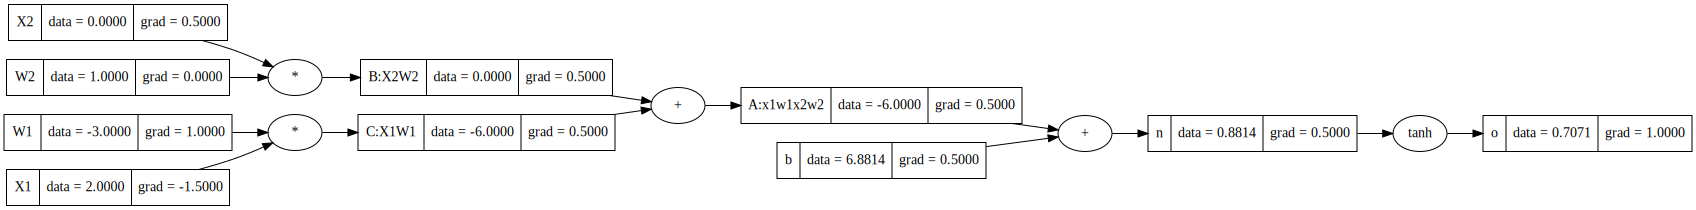

In [112]:
x1 = Value_v6(2.0, label='X1')
x2 = Value_v6(0.0, label='X2')
w1 = Value_v6(-3.0, label='W1')
w2 = Value_v6(1.0, label='W2')
b = Value_v6(6.8813735870195432, label='b')

C = x1 * w1
C.label = 'C:X1W1'
B = x2 * w2
B.label = 'B:X2W2'
A = C + B
A.label = 'A:x1w1x2w2'
n = A + b
n.label = 'n'
o = n.tanh()
o.label = 'o'

# Back propogate the entier graph
o.backpropogate()

draw_dot(o)

{Value_v6(data = 0.0), Value_v6(data = 1), Value_v6(data = -1), Value_v6(data = 6.881373587019543), Value_v6(data = 0.8813735870195432), Value_v6(data = 0.7071067811865477), Value_v6(data = 2.0), Value_v6(data = -6.0), Value_v6(data = 0.0), Value_v6(data = -6.0), Value_v6(data = 6.828427124746192), Value_v6(data = 2), Value_v6(data = 5.828427124746192), Value_v6(data = 4.828427124746192), Value_v6(data = 0.1464466094067262), Value_v6(data = -1), Value_v6(data = 1.0), Value_v6(data = -3.0), Value_v6(data = 1.7627471740390863), Value_v6(data = 1)}
{(Value_v6(data = 2), Value_v6(data = 1.7627471740390863)), (Value_v6(data = -3.0), Value_v6(data = -6.0)), (Value_v6(data = 5.828427124746192), Value_v6(data = 6.828427124746192)), (Value_v6(data = 0.0), Value_v6(data = -6.0)), (Value_v6(data = -6.0), Value_v6(data = -6.0)), (Value_v6(data = 5.828427124746192), Value_v6(data = 4.828427124746192)), (Value_v6(data = 1), Value_v6(data = 6.828427124746192)), (Value_v6(data = 0.1464466094067262), V

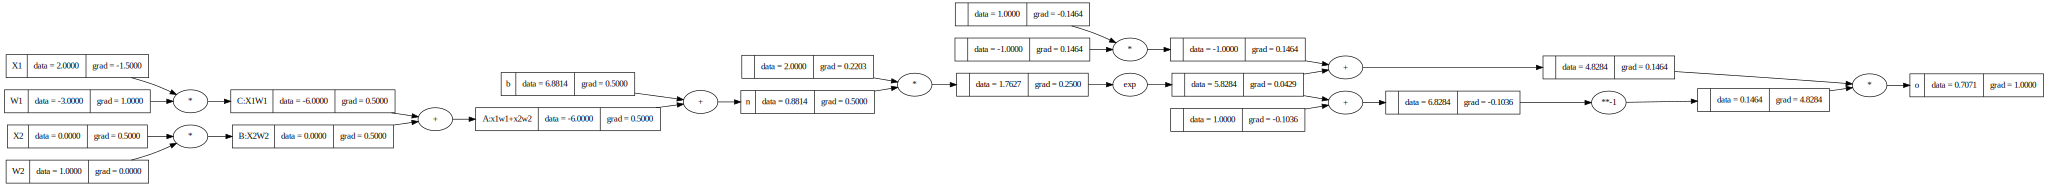

In [113]:
x1 = Value_v6(2.0, label='X1')
x2 = Value_v6(0.0, label='X2')
w1 = Value_v6(-3.0, label='W1')
w2 = Value_v6(1.0, label='W2')
b = Value_v6(6.8813735870195432, label='b')

C = x1 * w1
C.label = 'C:X1W1'
B = x2 * w2
B.label = 'B:X2W2'
A = C + B
A.label = 'A:x1w1+x2w2'
n = A + b
n.label = 'n'


########################################
# tanh(x) =  (e^(2x)-1) / (e^(2x) + 1)
# tanh(x) replace by exponenet equation
e = (2*n).exp()
o = (e-1)/(e+1)
o.label = 'o'
#######################################
o.backpropogate()

draw_dot(o)

# Implement the same NN using torch

In [114]:
import torch

In [115]:
x1 = torch.Tensor([2.0]).double(); x1.requires_grad = True
x2 = torch.Tensor([0.0]).double(); x2.requires_grad = True
w1 = torch.Tensor([-3.0]).double(); w1.requires_grad = True
w2 = torch.Tensor([1.0]).double(); w2.requires_grad = True
b = torch.Tensor([6.8813735870195432]).double(); b.requires_grad = True
n = x1*w1 + x2*w2 + b
o = torch.tanh(n)

print('----')
print('x1 = {} | grad ', x1.data.item())
print('x2', x2.data.item())
print('w1', w1.data.item())
print('w2', w2.data.item())
print('b', b.data.item())
print('n', n.data.item())
print('o', o.data.item())

o.backward()

----
x1 = {} | grad  2.0
x2 0.0
w1 -3.0
w2 1.0
b 6.881373405456543
n 0.881373405456543
o 0.7071066904050358


# Build a single $Neuron$ using micrograd code

![neuralmodel](neuron_model.jpeg)

In [116]:
class Neuron:
    def __init__(self, nin: int):
        """
        params:
            nin - number of inputs
        """
        
        self.data = 0.0
        # Initialize random weights. 
        # Number of weights need to be equals to number of inputs 
        self.w = []
        for i in range(nin):
            self.w += [Value_v6(random.uniform(-1, 1), label="w{}".format(i))]
        
        # Initalize a biase 
        self.b = Value_v6(random.uniform(-1, 1), label="b")
        
        
    def __call__(self, x: list):
        """ We want to call this method and compute the x*w + b """

        # this is the forward pass
        psum = 0.0
        for x, w in zip(x, self.w):
            psum += x * w
        
        # add the biase term
        out = psum + self.b
        
        # send through the activation function
        out.tanh()
        
        return out

In [117]:
# two inputs     
x = [2.0, 3.0]
# Create neuron object that has the initialized weights and biase terms
n = Neuron(len(x))
# input the x values and calculate the output of the neuron 
n(x) # <-- this call the __call__() method in the 

Value_v6(data = -5.6796745719582)

## Build the Layers of Neurons

![NN2](neural_net2.jpeg)

In [118]:
class Layer:
    """ Create a layer of neurons
    """
    def __init__(self, nin: int, nn: int):
        """ Initialize the neurons
        params:
            nn - Number of neurons in the layer
            nin - Number of inputs a neuron will take
        """
        self.neurons = []
        for i in range(nn):
            self.neurons += [Neuron(nin)]
        
    def __call__(self, x: list):
        """ calculate the layer 
        
        params:
            x - list of inputs
        """

        out = []
        for n in self.neurons:
            out += [n(x)]
            
        return out
        

# number of inputs
x = [2.0, 3.0, 5.0]

# Layer 1 has 4 neurons
l1 = Layer(len(x), 4)

# apply the forward pass 
out = l1(x)

pprint.pprint(out)
# draw_dot(out)

[Value_v6(data = -5.286357635033955),
 Value_v6(data = -4.8818921777897994),
 Value_v6(data = -0.17205898165071787),
 Value_v6(data = 4.764884697074223)]


## Generate a Multilayer Perceptron

In [128]:
class MLP:
    """ Create a multilayer perceptron """
    
    def __init__(self, nin: int, nouts: []):
        
        sz = [nin] + nouts
        self.layers = []
        for i in range(len(nouts)):
             self.layers += [Layer(sz[i], sz[i+1])]
        
    def __call__(self, x):
        for layer in self.layers:
            x = layer(x)
        return x
    
        
x = [2.0, 3.0, 5.0]

mlp1 = MLP(len(x), [4, 4, 1])

mlp1(x)



[Value_v6(data = -1.8646087452397684)]

In [ ]:
# draw_dot(o)